## <font color='white'>Importing libraries</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <font color='white'>Data Cleaning</font>

In [2]:
df = pd.read_csv("loan.csv", header=0, low_memory=False)
df.head(2)

FileNotFoundError: [Errno 2] No such file or directory: 'loan.csv'

In [ ]:
# Get the Shape of dataset
df.shape

(39717, 111)

> Clean the Null Column

In [ ]:
null_col = df.isnull().sum()
null_col = null_col[null_col.values > (0.6*len(df))]


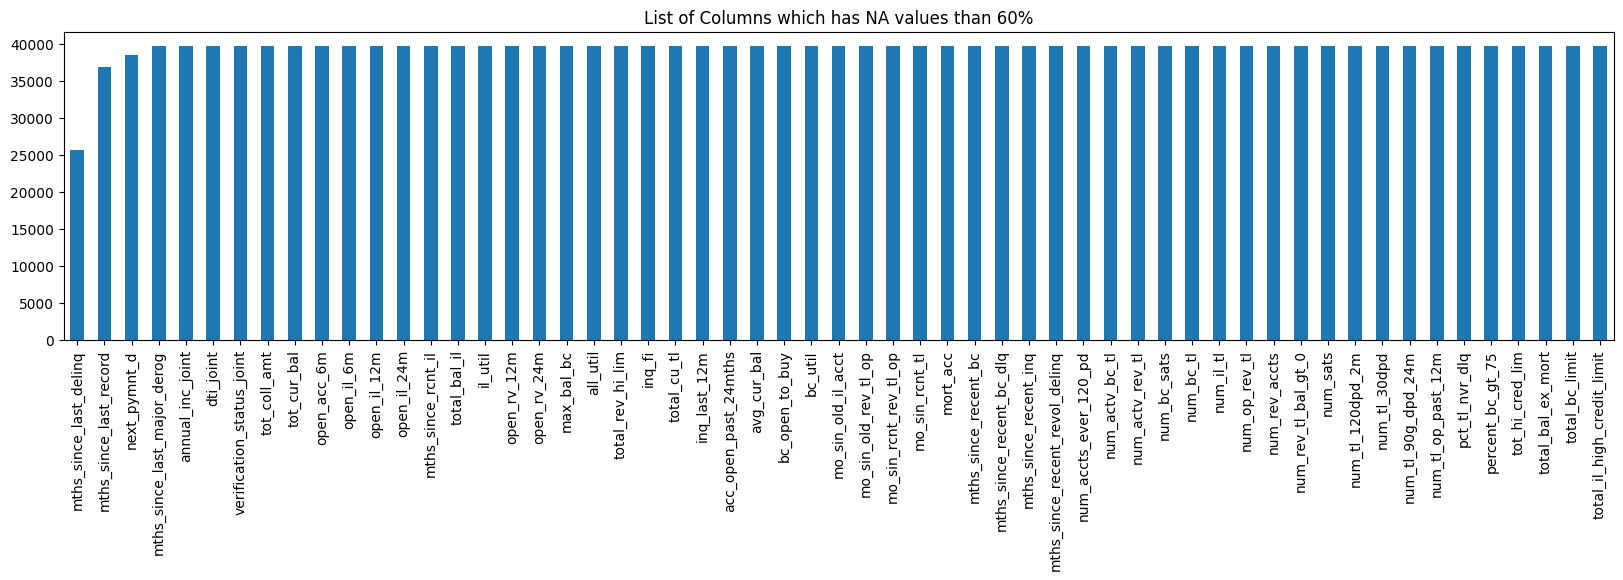

In [ ]:
plt.figure(figsize=(20,4))
null_col.plot(kind='bar')
plt.title('List of Columns which has NA values than 60%')
plt.show()

##### <font color='lawngreen'>Finding/Insight</font> : There 48% of total column which contain all Null values.

- 1.Drop all the column which has 70% ``NA`` values 

In [ ]:
df = df.dropna(axis='columns', how='all')
df =  df.drop(['mths_since_last_record'], axis=1)
df =  df.drop(['next_pymnt_d'], axis=1)

- 2.Drop the customer behavioral columns

In [ ]:
df = df.drop(['application_type','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','recoveries','total_rec_late_fee',
'total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt','out_prncp_inv','out_prncp','total_acc','revol_util','revol_bal','pub_rec',
'open_acc','inq_last_6mths','earliest_cr_line','delinq_2yrs'],axis=1)

- 3.Drop all the rows which have ``loan_status`` as ``Current``

In [ ]:
df = df[~(df.loan_status == 'Current')]

Need to drop columns which has same/unique values 
- collections_12_mths_ex_med
- chargeoff_within_12_mths
- tax_liens

In [ ]:
df = df.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','policy_code','initial_list_status','acc_now_delinq','delinq_amnt','url','pymnt_plan'], axis=1)
df.shape

(38577, 25)

#### Derived Matrics

- 1. Extract Year and Month from column ``issue_d``


In [ ]:
# Assign Months,Year to 'issue_mnth' and 'issue_yr' column respectively
df['issue_mnth'], df['issue_yr'] = df['issue_d'].str.split('-',1).str
# Typecast the 'issue_yr' column to 'int' (default type: str) 
df.issue_yr = df.issue_yr.astype('int32')
df[['issue_yr','issue_mnth','issue_d']].head(2)

C:\Users\chirag\AppData\Local\Temp\ipykernel_17424\3990542076.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['issue_mnth'], df['issue_yr'] = df['issue_d'].str.split('-',1).str


,issue_yr,issue_mnth,issue_d
0,11,Dec,Dec-11
1,11,Dec,Dec-11


- 2. Remove ``%`` from ``int_rate`` column.

In [ ]:
df.int_rate = df['int_rate'].apply(lambda x : float(x.strip('%')))
df[['int_rate']].head(2)

,int_rate
0,10.65
1,15.27


## <font color='white'>Data Analysis</font>

### 1. Univariate Analysis
> 1. categorical Data variable

<AxesSubplot: >

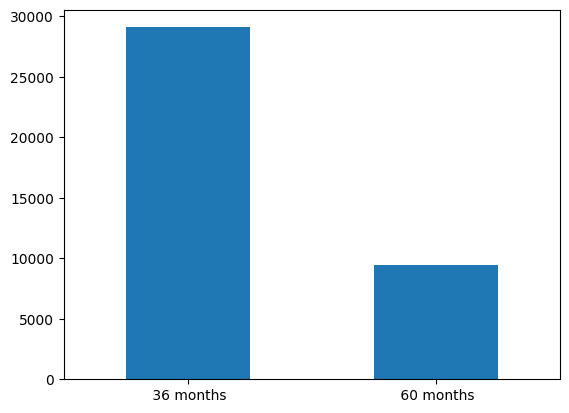

In [ ]:
df['term'].value_counts()
df['term'].value_counts().plot(kind='bar',rot=0)

##### <font color='lawngreen'>Finding/Insight</font> : Around ``75%`` of the applicant apply loan for ``36 month term period``.

<AxesSubplot: >

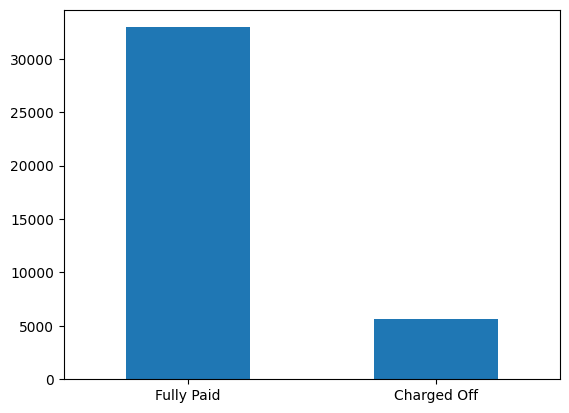

In [ ]:
df.loan_status.value_counts().plot(kind='bar', rot=0)

##### <font color='lawngreen'>Finding/Insight</font> : ``14.5%`` of the loan borrowers ``Charged Off`` .

> 2. Numerical Data variable

<AxesSubplot: xlabel='loan_amnt'>

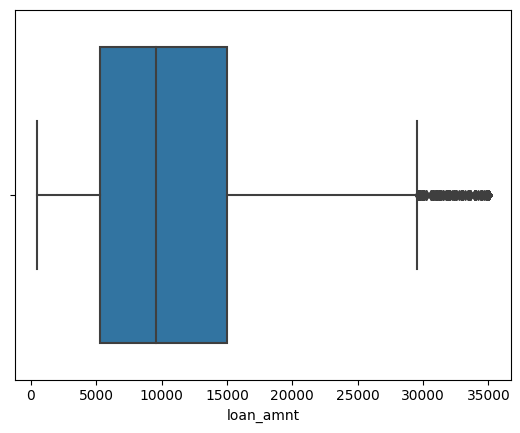

In [ ]:

sns.boxplot(x= df.loan_amnt)

##### <font color='lawngreen'>Finding/Insight</font> : Most of the people take loan which is distributed between ``5000 to 15000 Loan Amount``.


<AxesSubplot: xlabel='int_rate'>

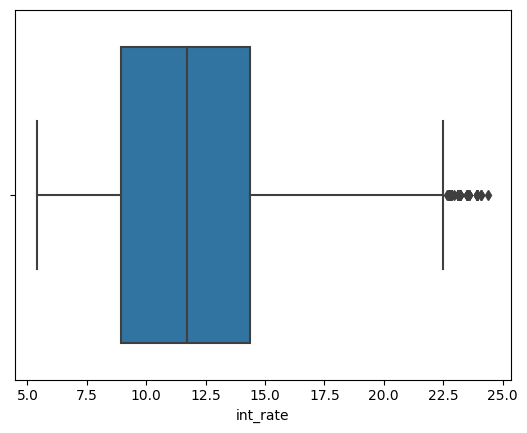

In [ ]:
sns.boxplot(x= df.int_rate)

##### <font color='lawngreen'>Finding/Insight</font> : Most of the loan interest rate distributed between ``8.9% to 14% ``.


### 2. Bivariate/Multivariate Analysis

<AxesSubplot: xlabel='loan_status', ylabel='int_rate'>

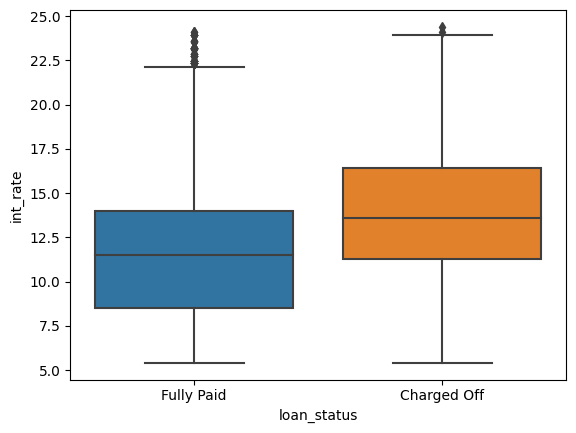

In [ ]:
sns.boxplot(y=df.int_rate, x= df.loan_status)

##### <font color='lawngreen'>Finding/Insight</font> : Applicants who borrow the loan on int_rate of 14% to 17% has high probability to ``Charged off``.


<AxesSubplot: xlabel='int_rate', ylabel='funded_amnt'>

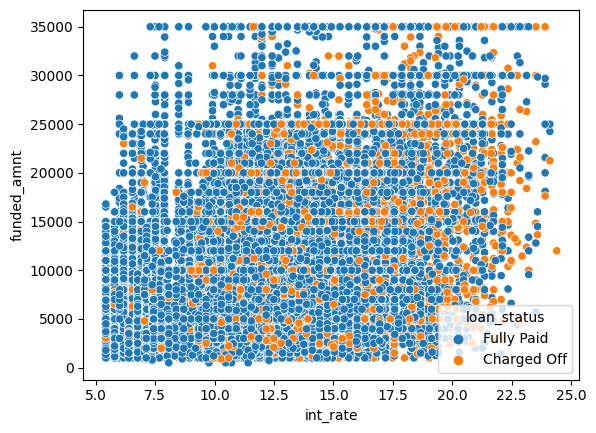

In [ ]:
x = df['int_rate']
y = df['funded_amnt']
sns.scatterplot(x=df['int_rate'], y=df['funded_amnt'], hue=df['loan_status'])

##### <font color='lawngreen'>Finding/Insight</font> : Applicants with funded_amount between 15k-25k on int_rate of 17.5%-22.5% has high probability to ``Charged off``.


<AxesSubplot: xlabel='loan_status', ylabel='purpose'>

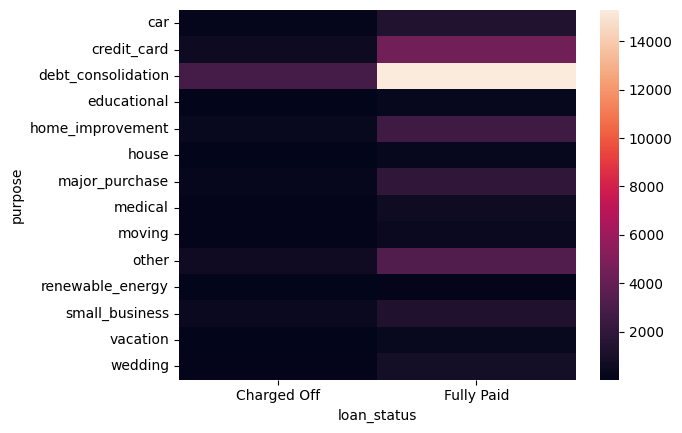

In [ ]:
sns.heatmap(pd.crosstab(df['purpose'], df['loan_status']))

##### <font color='lawngreen'>Finding/Insight</font> : The number Applicants who ``Charged off`` with purpose of ``debt_consolidation`` is high compare to other purpose.


<AxesSubplot: xlabel='emp_length', ylabel='count'>

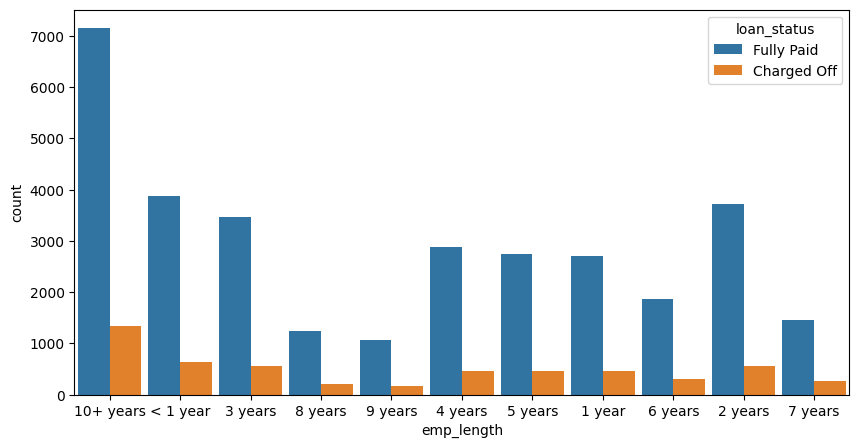

In [ ]:
plt.figure(figsize =(10,5))
sns.countplot(x = df.emp_length, hue=df.loan_status,width=0.9)

##### <font color='lawngreen'>Finding/Insight</font> : Applicants with less than <1 and 10+ year of experience highly probable to ``Charged off``.


<AxesSubplot: xlabel='grade', ylabel='count'>

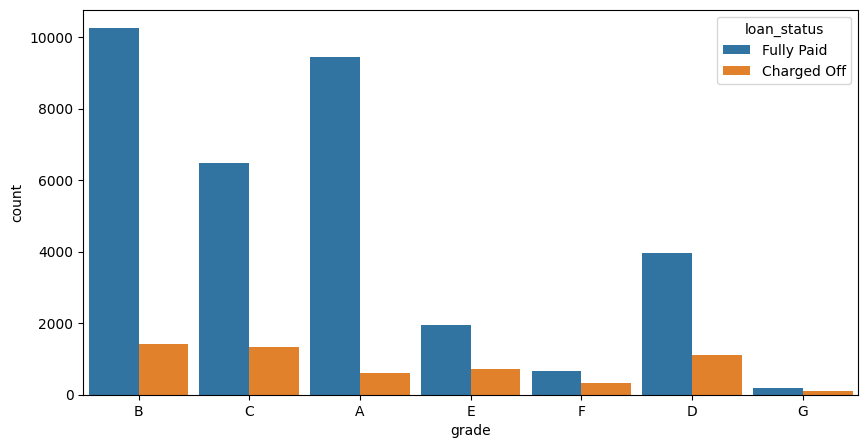

In [ ]:
plt.figure(figsize =(10,5))
sns.countplot(x = df.grade, hue=df.loan_status,width=0.9)

##### <font color='lawngreen'>Finding/Insight</font> : A we move from Grade A to D the ``Charged off`` percentage get increases.
